# 뉴스 요약봇 만들기(텍스트 요약기)

* =========== 학습과정==================
* 텍스트 요약(Text Summarization)기술
 - 추출적 요약(Extractive Summarization)
 - 추상적 요약(Abstractive Summarization)
 
* 인공 신경망으로 텍스트 요약 훈련시키기
 - seq2seq 모델에 대한 개요,구조, 요소
 
* 데이터 준비하기
 - 아마존 리뷰 데이터셋
 
* 데이터 전처리하기
 - 불용어 제거, 정규화, 정수인코딩
 
* 모델 설계하기
 - 인코더와 디코더, 어텐션을 설계하고 코드로 구현
 
* 모델 훈련하기
 - EarlyStopping 적용하여 모델을 학습
 
* 인퍼런스 모델 구현하기
 - 정수 인덱스 행렬로 나온 결과값을 실제 데이터로 복원하는 인퍼런스 모델을 코드로 구현
 
* 모델 테스트하기
 - 모델을 통해 얻은 요약문과 실제 요약문을 비교
 
* 추출적 요약 해보기
 - summa 패키지를 사용하여 추출적 요약(Extractive Summarization) 해보기

## 텍스트 요약(Text Summarization)이란?

 * 텍스트 요약(Text Summarization)이란, 
  - 긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary) 문장들로 변환하는 것을 말합니다
  - ex) 작은 텍스트인 뉴스 제목 뽑기
  
 * 중요한 것은 요약 전후에 정보 손실 발생이 최소화되어야 한다는 점

## 추출적 요약(Extractive Summarization)
 * 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식
  - 핵심적인 문장을 꺼내와서 몇개의 문장으로 구성된 요약문을 만드는 식
  - 머신 러닝 방식에 속하는 텍스트 랭크(TextRank) 알고리즘을 사용
  - ex) 네이버 뉴스 서비스에 있는 요약봇 기능
  - 문장 분류(Text Classification) 문제로 볼 수 있다

## 추상적 요약(Abstractive Summarization)
 * 원문으로부터 내용이 요약된 새로운 문장을 생성
   - 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것을 의미
   - 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역
   - RNN : 학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어렵다는 문제가 있습니다. 순차 데이터(Sequential data)
   - RNN의 문제를 해결하기 위해 LSTM과 GRU가 등장
   - 이 둘도 부족해서 어텐션(Attention) 메커니즘이 등장
   - 장기 종속성 문제(Long-Term Dependency Problem)
   - 장기 종속성 문제는 순차 데이터에서 학습 시 중요한 정보가 데이터의 시작 부분에 위치할 경우, 
     네트워크가 시간 경과에 따라 그 정보를 잊어버리는 현상을 말합니다

### 구글(Google)

 * 텐서플로 라이브러리를 사용한 텍스트 요약(Text summarization with TensorFlow)
 * 디스트빌리프(DistBelief)의 범용 확장판
 * 요약을 잘 하려면 기계학습 모델은 문서를 함축하고 중요한 정보를 추출해낼 수 있어야 한다. 문서 길이가 증가시에도
 * 중요해 보이는 부분을 추출하고 그걸 요약문에 담는 방식 -> 추출적 요약(Extractive Summarization)
 * 사람이 하는 것처럼 본문 일부 내용을 고쳐 쓸 수 있도록 허용하는 방식 -> 추상적 요약(abstractive summarization) => 구글(Google)방식
 * 구글이 메일서비스에 적용한 자동 회신(Smart Reply) 기능 : 시퀀스-투-시퀀스 러닝 방식을 적용
 * 텐서플로 라이브러리에 시퀀스-투-시퀀스 러닝 기법을 응용해 만든 일명 '기사 헤드라인 작성 모델 방법을 연구(2016/09/05 13:06 기사내용)

## 인공 신경망으로 텍스트 요약 훈련시키기

* seq2seq 모델을 통해서 Abstractive summarization(추상적 요약) 방식의 텍스트 요약기 만들기
* seq2seq은 두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해 내는 자연어 생성 모델

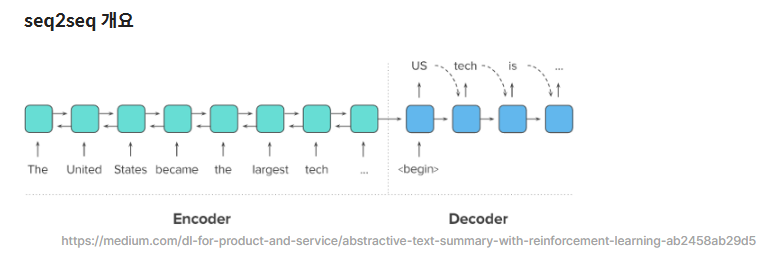

* 원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환해요
* 문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)
* 두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성

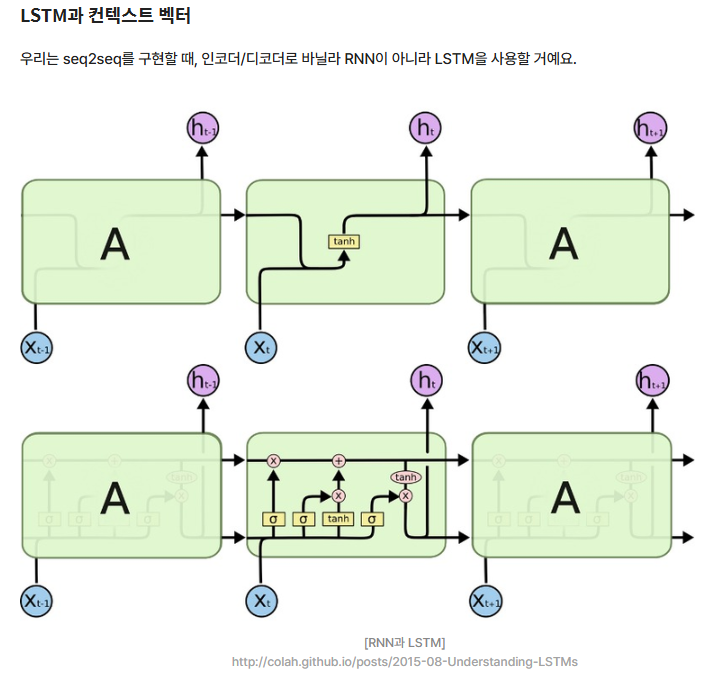

* LSTM은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점
* 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state h와 cell state c 두 개의 값 모두 존재해야 한다는 뜻

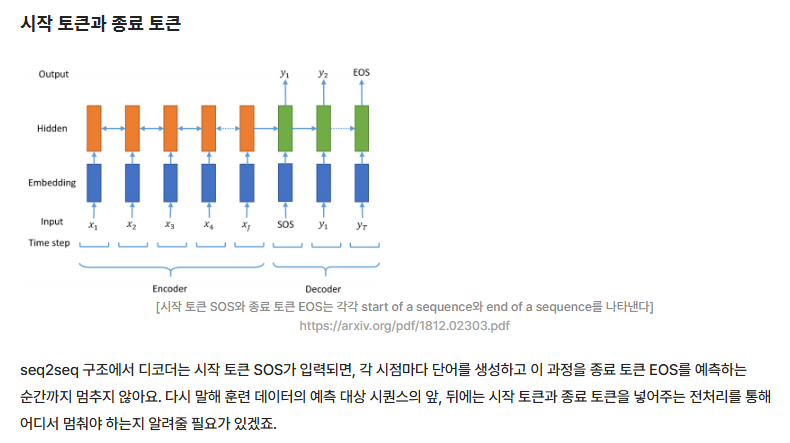

* 디코더는 시작 토큰 SOS가 입력되면, 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 EOS를 예측하는 순간까지 실행됨
* 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야 하는지 알려줄 필요가 있음.

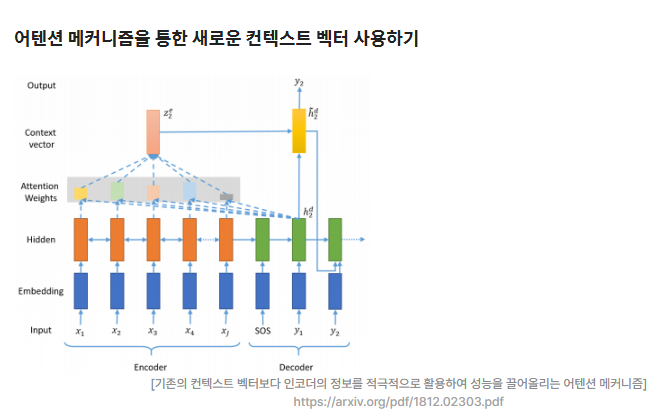

* 우리는 기존에 배운 seq2seq를 수정하고, 새로운 모듈을 붙여 모델의 성능을 높여볼 거예요


* 기존의 seq2seq는 인코더의 마지막 time step의 hidden state를 컨텍스트 벡터로 사용
* RNN 계열의 인공 신경망(바닐라 RNN, LSTM, GRU) 한계로 인해, 컨텍스트 정보는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태
* 어텐션 메커니즘(Attention Mechanism) : 인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것
  - 인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식
* 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 디코더의 현재 스텝이 어디냐에 따라 계속 달라진다는 점
  - ex) 디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것
* 기본적인 seq2seq 모델에서 컨텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값을 가집니다

* 디코더의 현재 스텝에 따라 동적으로 달라지는 인코더의 컨텍스트 벡터를 사용해서 현재의 예측에 활용하면, 디코더가 좀 더 정확한 예측을 할 수 있게 돼요

* Attention 기법은 seq2seq을 비롯하여 향후 다양한 딥러닝 분야를 획기적으로 발전시킨 핵심 개념이 됩니다

* 최종정리
 1. seq2seq를 사용합니다.
 2. RNN 계열 중 LSTM을 사용하므로 hidden state뿐만 아니라 cell state도 사용해야 합니다.
 3. 디코더의 예측 시퀀스에는 시작 토큰 SOS와 예측 토큰 EOS를 시퀀스의 앞, 뒤로 붙입니다.
 4. seq2seq를 구동시키면 디코더는 시작 토큰을 입력받아 예측을 시작합니다.
 5. seq2seq 기본 모델과 달리, 어텐션 메커니즘을 이용해 인코더의 hidden state의 중요도를 취합한 컨텍스트 벡터를 디코더 스텝별로 계산합니다.
 6. 계산된 컨텍스트 벡터를 이용해서 디코더는 다음 등장할 단어를 예측합니다.

# 데이터 준비하기

In [1]:
# 작업폴더 생성
mkdir -p ~/aiffel/news_summarization/data

* 데이타셋 : 아마존 리뷰 데이터셋

In [1]:
#다운로드한 csv파일을 샐성한 작업폴더에 링크 복사함
!ln -s ~/data/*.csv ~/aiffel/news_summarization/data

ln: failed to create symbolic link '/aiffel/aiffel/news_summarization/data/Reviews.csv': File exists


* NLTK의 불용어(stopwords)를 사용
* NLTK를 설치하고 NTLK의 데이터셋을 다운로드
* NLTK : Natural Language Toolkit의 축약어로 영어 기호, 통계, 자연어 처리를 위한 라이브러리
* 불용어를 제거하는 작업을 진행
* NLTK 패키지에서 불용어 사전을 다운로드

In [2]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [3]:
#데이터셋 로드
data = pd.read_csv(os.getenv("HOME")+"/aiffel/news_summarization/data/Reviews.csv", nrows=100000)

#data1 = os.getenv("HOME")
#print(data1)

print('전체 샘플수 :', (len(data)))

/aiffel
전체 샘플수 : 100000


In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


* 사실 전체 데이터 중 Summary 열과 Text 열만 훈련에 사용

In [5]:
# Text와 Summary 컬럼의 데이터만 남기는 코드를 작성

data = data[['Text', 'Summary']]  # 'Text'와 'Summary' 컬럼만 남기기
data.head()  #데이터의 첫 5개 행 확인

#랜덤한 15개 샘플 출력
data.sample(15)

,Text,Summary
59325,This cocoa may be a bit more expensive than th...,Worth every penny
31254,BBQ = very tasty.<br /><br />Original = Not th...,BBQ Flavor is...well.....DAMN GOOD
2011,"I'm sorry not everyone likes this mix, but we ...",Excellent
93900,Unfortunately I do not have much to say the pr...,"Walden Farms Thick and Spicy BBQ Sauce, Sugar ..."
18678,my 11 year old lab can once again run and play...,"amazing, my 11 year old lab, can play with my ..."
74399,I've been eating these chips with my lunch eve...,"Good quality with a quaint, natural taste"
89128,I've tried a few different brands of extra-vir...,"Fresh, flavorful, and hexane-free"
2976,I tried vanilla cake mix and pizza crust mix a...,strange flavor
40503,Love this herbal tea! It's so delicious! It ta...,Delicious Herbal Tea!
63323,Not the greatest canned coffee ever made...it ...,Illy issimo coffee


* 인공 신경망을 통해 Text 시퀀스를 입력받으면, Summary 시퀀스를 예측하도록 인공 신경망을 훈련시킬예정
* Text 열의 내용을 요약한 것이 Summary 열

# 데이터 전처리하기 
## (1) 데이터 정리하기

* nunique() : 데이터에 고유값들의 수를 출력해주는 함수
* unique() : 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용

In [6]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [7]:
print('Text 열에서 고유값 종류 :', data['Text'].unique())
print('Summary 열에서 고유값 종류 :', data['Summary'].unique())

Text 열에서 고유값 종류 : ['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'
 ...
 "

### 중복 샘플을 제거

In [8]:
# 데이터프레임의 drop_duplicates()를 사용하여, 중복 샘플을 제거

# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88426


### Null 값이 있는지 확인

In [9]:
#데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용

print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


### Null을 제거 :  dropna() 사용

In [10]:
# 데이터프레임에서 Null을 제거할 때는 dropna() 함수를 사용

data.dropna(axis=0, inplace=True)  #데이터프레임에서 결측값(NA 또는 NaN)을 포함하는 행을 제거
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88425


In [11]:
#데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용

print(data.isnull().sum())

Text       0
Summary    0
dtype: int64


## 텍스트 정규화와 불용어 제거

* 텍스트 정규화(text normalization) : 같은 의미인데도 다른 표현으로 쓰인 단어를 학습 전에 미리 같은 표현으로 통일시켜주는 것
* 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성

In [1]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


* 불용어(stopwords): 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들

In [14]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

* NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179
* 불용어를 제거, 모든 영어 문자는 소문자로 변경, 섞여있는 html 태그를 제거, 정규 표현식을 통해 각종 특수문자를 제거
* Text 전처리 시에서만 호출, Summary 전처리할 때는 호출하지 않을 예정
* Abstractive한 문장 요약을 위해서 remove_stopwords를 추가

### 구현한 데이터 전처리 함수

In [15]:
# 데이터 전처리 함수

def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:        
        # 문장을 공백 기준으로 나누어 단어 리스트생성(sentence.split), 단어가 불용어에 속하지 않을 경우만 포함, 길이가 1 이하인 단어 제거
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    
    # 불용어 미제거 (Summary)
    else:
        #불용어를 제거하지 않고, 단순히 길이가 1 이하인 단어만 제외하고 나머지를 모두 포함
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

print('=3')

=3


### 데이터 전처리 test 결과

In [17]:
# 전처리 전, 후의 결과를 확인하기 위해서 임의의 text와 summary를 만들어 함수를 호출

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


* 먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력
* Summary의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행 필요

In [18]:
# 훈련 데이터 전체의 Text 컬럼의 데이터를 전처리하는 코드를 작성
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = []

# 데이터프레임 data의 Text 컬럼에 대해 전처리 실행
for text in data['Text']:
    clean_text.append(preprocess_sentence(text))    

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])


Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


In [19]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_summary = []

# 데이터프레임 data의 summary 컬럼에 대해 전처리 실행
for text in data['Summary']:
    clean_summary.append(preprocess_sentence(text, False))   

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


* 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋아요
* 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체

In [20]:
import numpy as np

data['Text'] = pd.Series(clean_text)   # Series로 변환 후 저장
data['Summary'] = pd.Series(clean_summary)

# 빈 값을 Null 값으로 변환
data['Text'].replace('', np.nan, inplace=True)  # Text 컬럼에 대해 빈 값을 NaN으로 변환
data['Summary'].replace('', np.nan, inplace=True)  # Summary 컬럼에 대해 빈 값을 NaN으로 변환

print('=3')

=3


In [21]:
# Null 값이 생겼는지 해볼게요.

data.isnull().sum()

Text       9649
Summary    9710
dtype: int64

In [22]:
data['Text'].isnull().sum()

9649

In [23]:
data['Summary'].isnull().sum()

9710

In [24]:
# 전체 Null 값을 확인 및 제거
data.dropna(axis=0, inplace=True)  # Null 값이 포함된 행 제거
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 78715


In [25]:
print(data.nunique())

data.isnull().sum()

Text       78649
Summary    56428
dtype: int64


Text       0
Summary    0
dtype: int64

## (2) 훈련데이터와 테스트데이터 나누기

* 학습을 진행하기 위해서는 학습에 사용할 데이터의 크기를 결정하고, 문장의 시작과 끝을 표시

### 샘플의 최대 길이 정하기

* Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.84903766753478
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.013479006542591


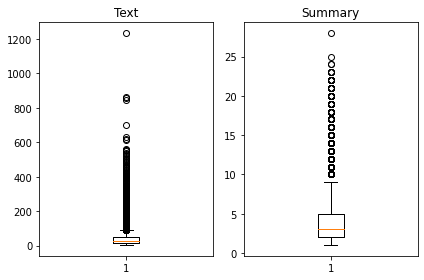

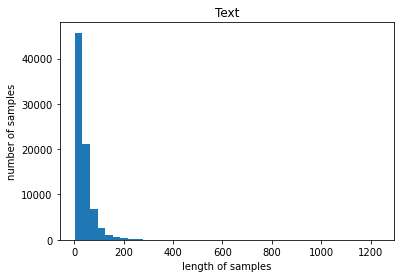

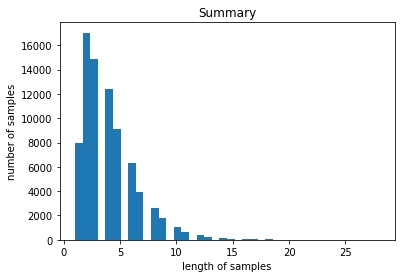

In [26]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

#실제 텍스트와 요약의 길이 분포
plt.subplot(1,2,1)  #Text
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)  #Summary
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

#실제 텍스트 샘플 길이별 개수
plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#요약본 샘플 길이별 개수
plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [27]:
# Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정하기

text_max_len = 50
summary_max_len = 8
print('=3')

=3


In [28]:
# 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수 만들기

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

print('=3')

=3


In [29]:
# Text와 Summary에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 확인하기

below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7742234643968748
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9425268373245251


In [30]:
# Text와 Summary 컬럼에서 max_len 초과 샘플을 제외
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 58623


### 시작 토큰과 종료 토큰 추가하기

* 디코더는 시작 토큰을 입력받아 문장을 생성하기 시작
* 종료 토큰을 예측한 순간에 문장 생성을 멈춤
* 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있어요
* 시작 토큰 : sostoken, 종료 토큰: eostoken,  앞, 뒤로 추가
  - 시작 토큰이 맨 앞에 있는 문장의 이름 : decoder_input
  - 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름 : decoder_target


In [31]:
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [32]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

print('=3')

=3


* 훈련 데이터와 테스트 데이터를 분리(직접코딩, 분리 패키지를 사용)

In [33]:
# 직접코딩, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[22521 39557 23663 ... 25869 53460 31659]


In [34]:
# 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의하여 섞어주기

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [35]:
#  8:2의 비율로 훈련 데이터와 테스트 데이터로 분리
n_of_val = int(len(encoder_input)*0.2)  #검증데이터
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 11724


In [36]:
#:표시의 위치에 주의
encoder_input_train = encoder_input[:-n_of_val]  #훈련데이타 (처음~80%까지)
decoder_input_train = decoder_input[:-n_of_val]  #훈련 디코더 입력start (처음~80%까지)
decoder_target_train = decoder_target[:-n_of_val] #훈련 디코더 label end  (처음~80%까지)

encoder_input_test = encoder_input[-n_of_val:]   #검증데이타 (20%~끝까지)
decoder_input_test = decoder_input[-n_of_val:]   #검증 디코더 입력 start  (20%~끝까지)
decoder_target_test = decoder_target[-n_of_val:] #검증 디코더 label end (20%~끝까지)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 46899
훈련 레이블의 개수 : 46899
테스트 데이터의 개수 : 11724
테스트 레이블의 개수 : 11724


## (3) 정수 인코딩

### 단어 집합(vocabulary) 만들기 및 정수 인코딩

* 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 해요
* 고유한 정수를 맵핑하는 작업이 필요, 이 과정을 단어 집합(vocabulary) 을 만든다고 표현
* 훈련 데이터에 대해서 단어 집합을 만들기, encoder_input_train에 대해서 단어 집합을 만들게요
* Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있어요

In [37]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


* 현재 생성된 단어 집합 : src_tokenizer.word_index에 저장
* 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행 
* 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
* 단어와 각 단어의 등장 빈도수가 저장 : src_tokenizer.word_counts.items()

### Text 데이터,  encoder_input_train : 훈련데이타 처리

In [38]:
# 통계적인 정보 (encoder_input_train : 훈련데이타)

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('rare_freq:',rare_freq)
print('total_freq:',total_freq)
    
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

rare_freq: 40940
total_freq: 1130816
단어 집합(vocabulary)의 크기 : 30371
등장 빈도가 6번 이하인 희귀 단어의 수: 22555
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7816
단어 집합에서 희귀 단어의 비율: 74.26492377597049
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.6203944762012568


In [39]:
# 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거
# 제외한 단어 집합의 크기를 8천여 개로 계산
# 토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있음

src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

print('=3')

=3


In [40]:
# texts_to_sequences() : 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행
# 현재 단어 집합의 크기를 8,000으로 제한
# 이제 8,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않아요

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[6, 288, 225, 2277, 291, 12, 101, 147, 302, 2018, 7], [461, 8, 127, 8, 752, 2861, 4, 33, 6073, 8, 1865, 47, 8, 2297, 2297, 496, 2297, 461, 8, 111, 134, 110, 2954, 44, 1, 2688, 8, 347, 291, 999, 217, 414, 361, 77, 4785, 407, 66, 8, 265, 5523, 186, 330, 86, 2913, 2954, 111, 461, 8, 311], [519, 282, 340, 451, 39, 9, 90, 99, 1454, 134, 6]]


### Summary 데이터에 대해서도 동일한 작업을 수행

In [41]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


* 각 단어에 고유한 정수가 부여 : tar_tokenizer.word_index에 저장
* 단어와 각 단어의 등장 빈도수가 저장 : tar_tokenizer.word_counts.items() 저장
* 통계적인 정보, 등장 빈도수가 6회 미만인 단어들이 얼만큼의 비중을 차지하는지 확인

In [42]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('total_freq:', total_freq)    
print('rare_freq:', rare_freq)  
     
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

total_freq: 207239
rare_freq: 13092
단어 집합(vocabulary)의 크기 : 9974
등장 빈도가 5번 이하인 희귀 단어의 수: 7754
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2220
단어 집합에서 희귀 단어의 비율: 77.74212953679567
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.317343743214357


* 5회 이하인 단어들은 단어 집합에서 약 77%를 차지
* 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.87%
* 이 단어들은 모두 제거
* 어림잡아 2,000을 단어 집합의 크기로 제한

In [43]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 49], [1, 1416, 665, 353, 13, 170], [1, 816, 1801, 27], [1, 1178, 1986], [1, 15, 19, 6, 4]]
target
decoder  [[49, 2], [1416, 665, 353, 13, 170, 2], [816, 1801, 27, 2], [1178, 1986, 2], [15, 19, 6, 4, 2]]


* 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 -> 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있어요
* 요약문(Summary)에서 길이가 0이 된 샘플들의 인덱스를 받아와볼게요
* 주의할 점은 요약문인 decoder_input: sostoken, decoder_target : eostoken 이 추가된 상태로 단어 집합 제한에도 삭제되지 않아요
* 요약문의 실제 길이는 1로 나올 거예요. 길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아 있을 테니까요, 

* 훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장
* 이 샘플들은 모두 삭제

In [44]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1] #요약문의 길이가 1인 경우 갯수
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1139
삭제할 테스트 데이터의 개수 : 305
훈련 데이터의 개수 : 45760
훈련 레이블의 개수 : 45760
테스트 데이터의 개수 : 11419
테스트 레이블의 개수 : 11419


### 패딩하기

* 서로 다른 길이의 샘플들을 병렬 처리하기 위해, 같은 길이로 맞춰주는 패딩 작업필요
* 아까 정해두었던 최대 길이로 패딩
* 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춘다.

In [45]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')

decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

print('=3')

=3


### ------ 전처리 과정 끝

# 모델 설계하기

### 함수형 API를 이용해서 인코더를 설계

In [46]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

* dropout : 레이어의 weight를 랜덤으로 생략하여 모델의 과적합(overfitting)을 해결해주는 방법
* recurrent dropout :  dropout을 레이어가 아닌 time step마다 해주는 방식
  - 즉 time step의 입력을 랜덤으로 생략해 주는 것
  - 일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다
* dropout과 recurrent dropout을 모두 사용한 것을 Variational Dropout

### 디코더를 설계

In [47]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
#decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3]) #인코더의 마지막 LSTM 상태를 디코더에 전달하도록 수정

* LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 해요

### 디코더의 출력층을 설계

In [48]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

* 디코더의 출력층은, Summary의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀러야 한다.
* Dense의 인자로 tar_vocab, 활성화 함수로 소프트맥스 함수 사용
* 인코더의 hidden state와 cell state를 초기 state로 사용하는 가장 기본적인 seq2seq
* 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법 : 어텐션 메커니즘

### 어텐션 메커니즘

In [49]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
#attn_out = attn_layer([decoder_outputs, encoder_outputs])
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

* 인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용하고, 어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동

# 모델 훈련하기

* 설계한 모델을 가지고 훈련을 진행

In [50]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
179/179 [==============================] - 20s 69ms/step - loss: 2.7454 - val_loss: 2.4140
Epoch 2/50
179/179 [==============================] - 11s 64ms/step - loss: 2.3907 - val_loss: 2.2936
Epoch 3/50
179/179 [==============================] - 11s 64ms/step - loss: 2.2765 - val_loss: 2.1971
Epoch 4/50
179/179 [==============================] - 12s 64ms/step - loss: 2.1713 - val_loss: 2.1140
Epoch 5/50
179/179 [==============================] - 12s 65ms/step - loss: 2.0780 - val_loss: 2.0473
Epoch 6/50
179/179 [==============================] - 12s 66ms/step - loss: 2.0048 - val_loss: 1.9969
Epoch 7/50
179/179 [==============================] - 12s 66ms/step - loss: 1.9465 - val_loss: 1.9690
Epoch 8/50
179/179 [==============================] - 12s 67ms/step - loss: 1.8996 - val_loss: 1.9438
Epoch 9/50
179/179 [==============================] - 12s 67ms/step - loss: 1.8566 - val_loss: 1.9252
Epoch 10/50
179/179 [==============================] - 12s 68ms/step - loss: 1.818

* 조기 종료를 뜻하는 EarlyStopping은 특정 조건이 충족되면 훈련을 멈추는 역할
* es = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
  - val_loss(검증 데이터의 손실)을 관찰하다가, 검증 데이터의 손실이 줄어들지 않고 
    증가하는 현상이 2회(patience=2) 관측되면 학습을 멈추도록 설정
* EarlyStopping이 작동한다면 epochs가 아무리 크게 설정되어 있어도 모델 훈련을 최적점에서 멈출 수 있음

### 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화

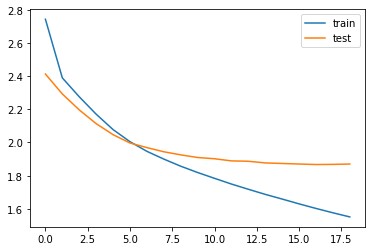

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 인퍼런스 모델 구현하기

* 테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원 필요
* 필요한 3개의 사전을 아래와 같이 미리 준비

In [52]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


* seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다는 것
* 훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로
  인코더와 디코더를 엮은 통짜 모델 하나만 준비
* 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에
  부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 합니다.
*  이때는 인코더 모델과 디코더 모델을 분리해서 설계합니다.

### 인코더 설계

In [53]:
# 인코더 설계
#encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


### 어텐션 메커니즘을 사용하는 출력층을 설계

In [54]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


### 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수 만들기

In [55]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

print('=3')

=3


# 모델 테스트하기

* 테스트 단계에서는 정수 시퀀스 -> 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편하다
* 주어진 정수 시퀀스 -> 텍스트 시퀀스로 변환하는 함수를 만들기
* Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고, (seq2text 함수)
* Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외 (seq2summary 함수)

In [60]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if (i!=0) and (i != tar_word_to_index['sostoken']) and (i != tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


* 테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교

In [61]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : amazing product vegan miss meat cheese dairy eggs perfect solution egg cravings low cholesterol diets allergic eggs tastes exactly like real thing without cholesterol buy regret 
실제 요약 : amazing 
예측 요약 :  love this stuff


원문 : yummy enough said little cookies good perfect amount sweetness crispness definitely ordering 
실제 요약 : yummy 
예측 요약 :  delicious


원문 : like consuming giant bowl brown rice eating rice mild flavored goes smoothies shakes soups sauces hot cold cereals end getting weight loss brown rice rice bran percent nutrient percent rice helpful regularity nice thank 
실제 요약 : rice goodness 
예측 요약 :  great rice


원문 : bought treats son read much glad bought one pretty much tasted awful 
실제 요약 : not tasty 
예측 요약 :  not my favorite


원문 : time bought santa idea less sized portions new would cover plastic wrap rubber band high dose sodium would santa dry made size portion case directly microwave cup food storage container since purchase noticed availability similar products b

예측 요약 :  great product


원문 : daughter gluten dairy free tried every pasta brand since like cook lot use rest left overs gluten free well heated also different consistency according daughter brand incredible perfect texture cooks easily husband even eat favorite brand perfect pasta picky gluten free eaters celiac gluten sensitive must try 
실제 요약 : awesome for gluten free eaters 
예측 요약 :  great gluten free pasta


원문 : nice sweet grew pretty quick little effort part highly recommend anyone advanced 
실제 요약 : very good sprouting peas 
예측 요약 :  good


원문 : fda issued warning pet treats made china look small print back bag made usa please trust health pets chinese made treats personally lost beloved pet know fda warning purchasing 
실제 요약 : made in china 
예측 요약 :  made in china


원문 : grains arrived form liquid concerned looked nothing like actual grains seller sent along instructions first experience grains know expect instructions also contained source could learn seller helpful standing b

# 추출적 요약 해보기

* seq2seq를 통해서 추상적 요약을 진행
* 텍스트 요약에는 추상적 요약 외에도 이미 본문에 존재하는 단어구, 문장을 뽑아서 요약으로 삼는 추출적 요약 방법
* 패키지 Summa에서는 추출적 요약을 위한 모듈인 summarize를 제공
* 영화 매트릭스 시놉시스를 요약해보면서 summarize 사용법 익히기

### 패키지 설치 (summa 설치)

In [2]:
!pip list | grep summa

summa                         1.2.0


In [63]:
#!pip install summa

### 데이터 다운로드하기

In [64]:
import requests
from summa.summarizer import summarize

In [65]:
# 매트릭스 시놉시스를 다운로드

text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [66]:
# text에는 매트릭스 시놉시스가 문자열로 저장
# 일부만 출력해보고, 잘 저장이 되었는지 확인

print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### summarize 사용하기

* Summa의 summarize()의 인자로 사용되는 값들에 대해서 알아보기
* ===========================================================
* text (str) : 요약할 테스트.
* ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
* words (int or None, optional) – 출력에 포함할 단어 수.
  만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
* split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

* Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행
* 그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있어요
* 비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄이기 (원문의 0.005%만을 출력)

In [67]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [68]:
# 리스트로 출력 결과를 받고 싶다면 split 인자의 값을 True

print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [82]:
# 단어의 수로 요약문의 크기를 조절할 수도 있다.
# 단어를 50개만 선택

print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.
